In [1]:
from tcsim.system import*
from tcsim.visualization import*
from tcsim.gates import*

## Lets take a look at the Char func direclty measured via the definition. Expectation value of the displacement operator.

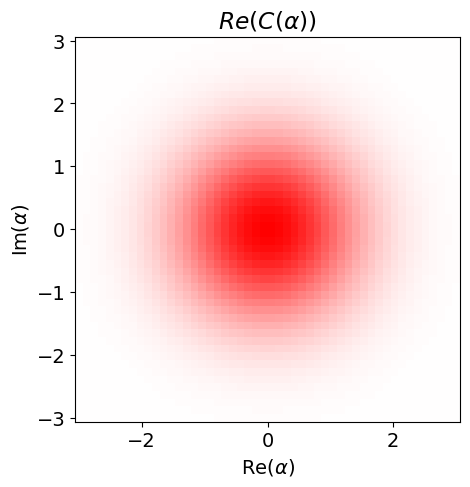

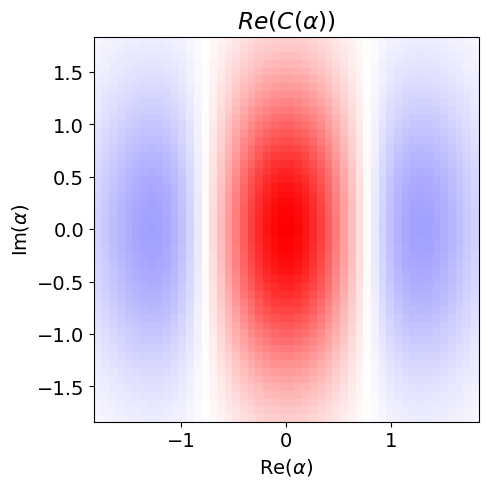

In [2]:
state = tensor(fock(2,0),coherent(N,1))
plot_char(vac)
plot_char(state, max_alpha = 1.8)

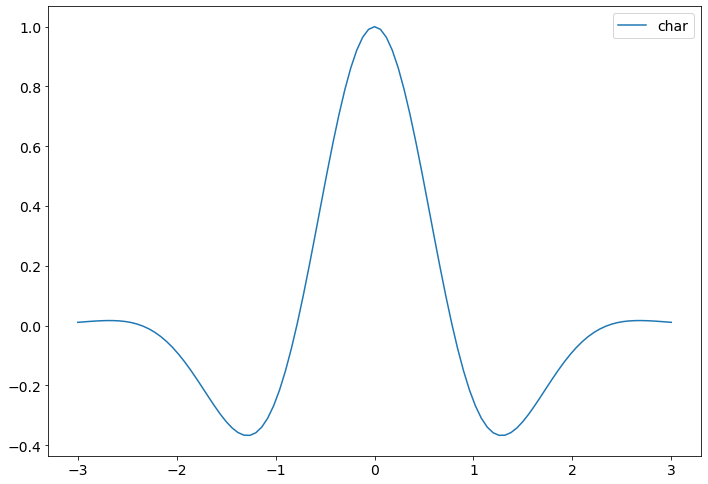

In [3]:
xvec = np.linspace(-3,3, 101)
cfReal,cfImag = char_func(state,xvec)
plt.plot(xvec,cfReal[50], label = 'char')
plt.legend()


## Lets take a look at char func with ECD implementation.

In [5]:

# conditional displacement operator 
def CD(beta):
    q = (a.dag()+a)/2 # need to understand why this factor seems to recreate experimental data.
    p = 1j*(a.dag()-a)/2
    
    return (1j*(np.real(beta)*p + np.imag(beta)*q)*sz).expm()

"""Function that calculates the characteristic function of a cavity coupled to a qubit. The protocol is the same as in Eickbusch et al. fast universal control of an oscillator. 
The function takes the inputs

state -> state whos characteristic function we want to calculate. Should be of the form tensor(qubit,cavity)

beta -> a np.linspace object which will define the values over which we calculate the characteristic function.


"""


def char_func_grid(state, xvec):

    CF_real = np.empty((len(xvec),len(xvec)))

    for i, alpha in enumerate(xvec):
        for j, alpha2 in enumerate(xvec):
            state1 = Rx(np.pi/2)*state
            state2 = CD((alpha + 1j*alpha2))*state1 
            state3 = Rx(np.pi/2)*state2  
            
            CF_real[i,j] =  - np.real(expect(sz,state3))
        
    return CF_real

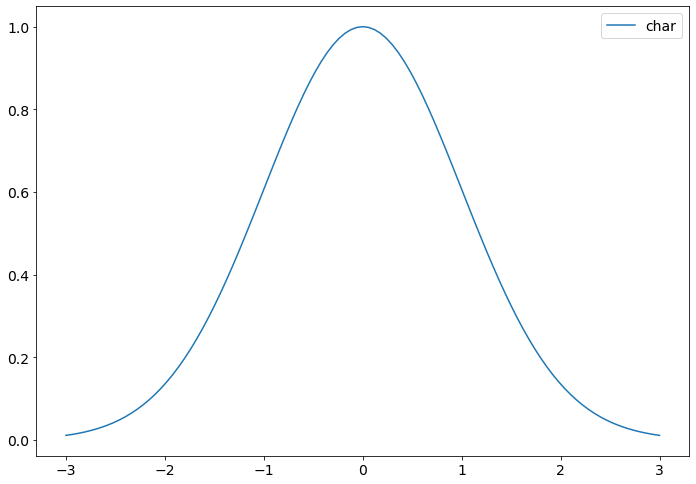

In [6]:
xvec = np.linspace(-3,3, 101)
cfReal = char_func_grid(vac,xvec)
plt.plot(xvec,cfReal[50], label = 'char')
plt.legend()

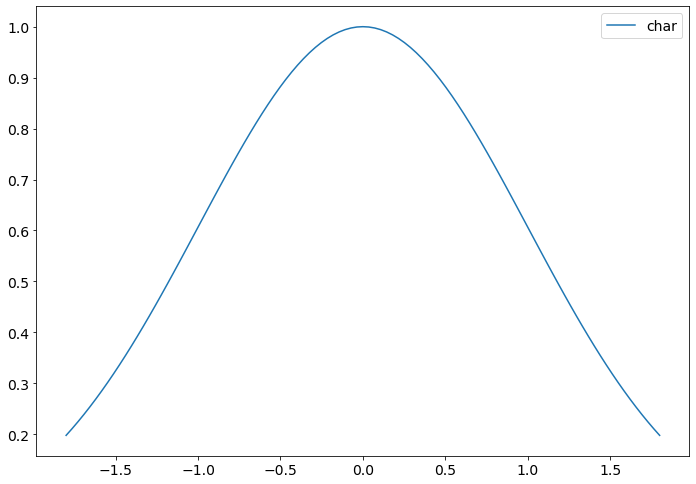

In [7]:
xvec = np.linspace(-1.8,1.8, 101)
cfReal = char_func_grid(vac,xvec)
plt.plot(xvec,cfReal[50], label = 'char')
plt.legend()

c:\\Users\\jonat\\Desktop\\Coding\\qcrew\\TransmonCavity\Visualization.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(


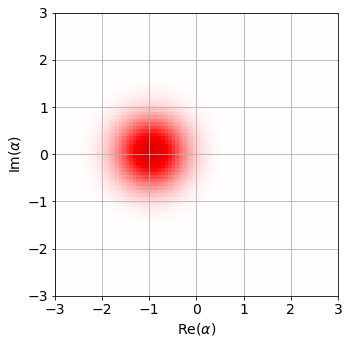

In [6]:
from Visualization import plot_wigner
plot_wigner(CD_ideal_operator(vac,2), max_alpha = 3)

c:\\Users\\jonat\\Desktop\\Coding\\qcrew\\TransmonCavity\Visualization.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(


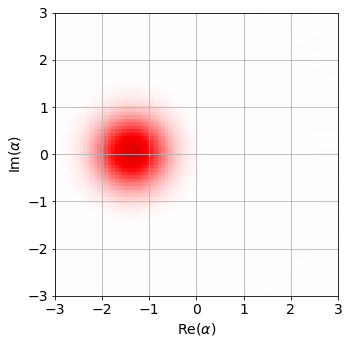

In [2]:
from Visualization import plot_wigner
plot_wigner(CD_ideal_operator(vac,2), max_alpha = 3)